# Repeated Measures ANOVA Test
Tests whether the means of two or more paired samples are significantly different.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.
Observations across each sample are paired.
Interpretation

H0: the means of the samples are equal.
H1: one or more of the means of the samples are unequal.
Python Code

Currently not supported in Python.

More Information

In [3]:
import pingouin as pg
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("data/10_rmanova.csv")
df.head()

,group,id,month0,month1,month3,month6
0,1,1,60,41,25,16
1,1,2,52,38,23,12
2,1,3,62,36,22,14
3,1,4,58,34,21,13
4,1,5,65,34,28,18


In [9]:
df2 = pd.melt(df, id_vars=["group","id"], var_name="time", value_name="value")
df2.head()

,group,id,time,value
0,1,1,month0,60
1,1,2,month0,52
2,1,3,month0,62
3,1,4,month0,58
4,1,5,month0,65


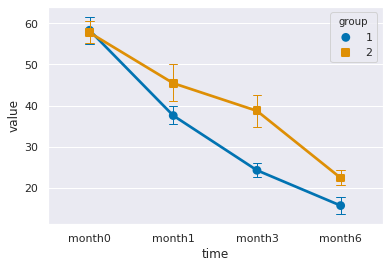

In [11]:
import seaborn as sns
sns.set()
sns.pointplot(data=df2, x='time', y='value', hue='group', markers=['o','s'],
             capsize=.1, errwidth=1, palette='colorblind')

In [12]:
df2.groupby(['time','group'])['value'].agg(['mean', 'std']).round(2)

mean   std
time   group             
month0 1      58.29  4.64
       2      57.71  3.90
month1 1      37.57  3.15
       2      45.43  6.55
month3 1      24.29  2.43
       2      38.71  5.77
month6 1      15.71  3.09
       2      22.43  2.64

In [25]:
aov = pg.rm_anova(dv='value', within='time',subject='id', data=df2, detailed=True)
print(aov)

  Source         SS  DF        MS        F        p-unc    p-GG-corr    np2  \
0   time  11366.054   3  3788.685  176.282  1.02162e-22  2.73767e-13  0.931   
1  Error    838.196  39    21.492        -            -            -      -   

     eps sphericity W-spher    p-spher  
0  0.543      False    0.28  0.0110023  
1      -          -       -          -  


In [26]:
aov = pg.mixed_anova(dv='value', within='time', between='group', subject='id', data=df2)
pg.print_table(aov)


ANOVA SUMMARY

Source              SS    DF1    DF2        MS        F    p-unc  p-GG-corr                 np2  eps    sphericity    W-spher    p-spher
-----------  ---------  -----  -----  --------  -------  -------  ----------------------  -----  -----  ------------  ---------  --------------------
group          707.161      1     12   707.161   19.709    0.001  -                       0.622  -      -             -          -
time         11366.054      3     36  3788.685  308.780    0.000  2.7376730593222917e-13  0.963  0.543  False         0.28       0.011002306227370045
Interaction    396.481      3     36   132.160   10.771    0.000  -                       0.473  -      -             -          -



In [13]:
res = AnovaRM(df2, 'value', 'id', within=['time'], aggregate_func='mean')

print(res.fit())

               Anova
     F Value  Num DF  Den DF Pr > F
-----------------------------------
time 176.2817 3.0000 39.0000 0.0000



In [1]:
import pyNOVA

In [7]:
pyNOVA.RM_ANOVA(df=df.drop(['group','id'], axis=1), corr='GG', p_normal=0.05, print_table=True)

                      epsilon  Cond_DoF  Error_DoF       eta           F       p-value
None                 1.000000  3.000000  39.000000  0.931319  176.281706  1.021620e-22
Greenhouse-Geissler  0.542924  1.628772  21.174034  0.931319  176.281706  2.737673e-13
Huynh-Feldt          0.609808  1.829425  23.782522  0.931319  176.281706  1.131666e-14
Average              0.576366  1.729098  22.478278  0.931319  176.281706  5.563030e-14


               W         p  Normal
month0  0.951775  0.588596    True
month1  0.871746  0.044400   False
month3  0.911871  0.167754    True
month6  0.954756  0.636665    True


(176.28170604401453, 2.7376730593222846e-13, 0.9313193003608227)